In [8]:
from scapy.all import *
import os

dns_pkts_analysis = "sample_packets\tcp_dump.pcap"
packets = rdpcap(dns_pkts_analysis)

for i, packet in enumerate(packets[:1]):
    print(f"Packet {i+1}")
    packet.show()

OSError: [Errno 22] Invalid argument: 'sample_packets\tcp_dump.pcap'

In [2]:
for i, packet in enumerate(packets[:1]):
    print(f"Packet {i+1}")
    packet.show()
    
packet

Packet 1
###[ Ethernet ]### 
  dst       = 00:0d:61:66:7f:47
  src       = 00:00:e2:5b:41:de
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 140
     id        = 42547
     flags     = 
     frag      = 0
     ttl       = 48
     proto     = udp
     chksum    = 0xd3b9
     src       = 216.109.118.150
     dst       = 192.168.0.200
     \options   \
###[ UDP ]### 
        sport     = 5000
        dport     = 5000
        len       = 120
        chksum    = 0x3dde
###[ Raw ]### 
           load      = '\\x80"\x04\\x9d\x00\x0c\\xb7\\xf0)\\xa8l\x17\x00\x02\\xddIrW\\xadT\x11\x14"\\x9d\\xf7}uv\\xffMJ\\xbf\\x81x\\xfa\\xacN\\xef:B\x14P\\xb9]{\\x97\x1f\\xb9lV2\\xddKw67z\\xa7\\x9b8H\x15\x1a\\xb0I\\xcfʖX2\\xdb\x1dl\\x8c\\xfa\x08\\xf0Ba)l;\\xc3RM\x18w\\xfdw\\xa2\\xb4_\x02\x1dz/\\xb5\x04\\x8a\'U\\x82:\\xfaymK-\\x96\\xb7\\xff\\xf1'



In [ ]:
def dissect_packet(packet):
    #print(packet.summary())
    
    # packet.show()
    if Ether in packet:
        print("Source MAC:", packet[Ether].src)
        print("Destination MAC:", packet[Ether].dst)
        
    if IP in packet:
        print("Source IP:", packet[IP].src)
        print("Destination IP:", packet[IP].dst) 
        print("Protocol:", packet[IP].proto)   
        
    if UDP in packet:
        print("Source Port:", packet[UDP].sport)
        print("Destination Port:", packet[UDP].dport)
        # print("Window: ", packet[UDP].window)
    
    if DNS in packet:
        print("DNS Query:", packet[DNS].qd.qname)
        print("DNS Response:", packet[DNS].an.rdata)
        
    print()
    
for i, packet in enumerate(packets[:15]):
    print(f"Packet {i+1}")
    dissect_packet(packet)

Packet 1
Source MAC: 00:00:e2:5b:41:de
Destination MAC: 00:0d:61:66:7f:47
Source IP: 216.109.118.150
Destination IP: 192.168.0.200
Protocol: 17
Source Port: 5000
Destination Port: 5000

Packet 2
Source MAC: 00:00:e2:5b:41:de
Destination MAC: 00:0d:61:66:7f:47
Source IP: 216.109.118.150
Destination IP: 192.168.0.200
Protocol: 17
Source Port: 5000
Destination Port: 5000

Packet 3
Source MAC: 00:00:e2:5b:41:de
Destination MAC: 00:0d:61:66:7f:47
Source IP: 216.109.118.150
Destination IP: 192.168.0.200
Protocol: 17
Source Port: 5000
Destination Port: 5000

Packet 4
Source MAC: 00:00:e2:5b:41:de
Destination MAC: 00:0d:61:66:7f:47
Source IP: 216.109.118.150
Destination IP: 192.168.0.200
Protocol: 17
Source Port: 5000
Destination Port: 5000

Packet 5
Source MAC: 00:00:e2:5b:41:de
Destination MAC: 00:0f:ea:17:ce:a9
Source IP: 64.4.48.250
Destination IP: 192.168.0.214
Protocol: 6

Packet 6
Source MAC: 00:00:e2:5b:41:de
Destination MAC: 00:0f:ea:17:ce:a9
Source IP: 64.4.48.250
Destination IP: 192

##  3 Live Traffic monitoring

In [9]:
import socket 
from scapy.all import *

def process_packet(packet):
    print(packet.summary())
    #packet.show()
    print()
    
def capture_live_traffic():
    sniff(prn=process_packet, store=0)
    
if __name__ == "__main__":
    capture_live_traffic()

Ether / IP / UDP 170.114.166.175:8801 > 192.168.62.121:64630 / Raw

Ether / IP / UDP 192.168.62.121:61836 > 239.255.255.250:ssdp / Raw

Ether / IP / TCP 192.168.62.121:51441 > 107.22.13.228:https PA / Raw

Ether / IP / UDP 192.168.62.121:55159 > 172.217.194.94:https / Raw

Ether / IP / UDP 170.114.166.175:8801 > 192.168.62.121:64630 / Raw

Ether / IP / UDP 172.217.194.94:https > 192.168.62.121:55159 / Raw

Ether / IP / UDP 170.114.166.175:8801 > 192.168.62.121:64630 / Raw

Ether / IP / UDP 170.114.166.175:8801 > 192.168.62.121:64630 / Raw

Ether / IP / UDP 170.114.166.175:8801 > 192.168.62.121:64630 / Raw

Ether / IP / UDP 170.114.166.175:8801 > 192.168.62.121:64630 / Raw

Ether / IP / TCP 170.114.166.175:https > 192.168.62.121:64733 PA / Raw

Ether / IP / UDP 170.114.166.175:8801 > 192.168.62.121:64630 / Raw

Ether / IP / UDP 170.114.166.175:8801 > 192.168.62.121:64630 / Raw

Ether / IP / UDP 170.114.166.175:8801 > 192.168.62.121:64630 / Raw

Ether / IP / UDP 172.217.194.94:https > 19

![Image Description](https://cdn.educba.com/academy/wp-content/uploads/2019/07/OSI-Model.png)


## 4-Live Traffic

In [1]:
import socket 
from scapy.all import *

# <!-- def process_packet(packet):
#     print(packet.summary())
#     #packet.show()  
#     print() -->

def dissect_packet(packet):
    #print(packet.summary())
    
    # packet.show()
    if Ether in packet:
        print("Source MAC:", packet[Ether].src)
        print("Destination MAC:", packet[Ether].dst)
        
    if IP in packet:
        print("Source IP:", packet[IP].src)
        print("Destination IP:", packet[IP].dst) 
        print("Protocol:", packet[IP].proto)   
        
    if UDP in packet:
        print("Source Port:", packet[UDP].sport)
        print("Destination Port:", packet[UDP].dport)
        # print("Window: ", packet[UDP].window)
    
    if DNS in packet:
        print("DNS Query:", packet[DNS].qd.qname)
        print("DNS Response:", packet[DNS].an.rdata)
        
    print()
    
def capture_live_traffic():
    # sniff(prn=process_packet, store=0)
    sniff(filter="tcp and (port 80 or port 443)", prn=dissect_packet, store=0)
    
if __name__ == "__main__":
    capture_live_traffic()



Source MAC: 66:6c:6d:6f:c3:08
Destination MAC: 4e:5c:b9:bf:02:96
Source IP: 192.168.62.121
Destination IP: 170.114.166.175
Protocol: 6

Source MAC: 4e:5c:b9:bf:02:96
Destination MAC: 66:6c:6d:6f:c3:08
Source IP: 52.168.117.170
Destination IP: 192.168.62.121
Protocol: 6

Source MAC: 4e:5c:b9:bf:02:96
Destination MAC: 66:6c:6d:6f:c3:08
Source IP: 52.168.117.170
Destination IP: 192.168.62.121
Protocol: 6

Source MAC: 4e:5c:b9:bf:02:96
Destination MAC: 66:6c:6d:6f:c3:08
Source IP: 52.168.117.170
Destination IP: 192.168.62.121
Protocol: 6

Source MAC: 4e:5c:b9:bf:02:96
Destination MAC: 66:6c:6d:6f:c3:08
Source IP: 52.168.117.170
Destination IP: 192.168.62.121
Protocol: 6

Source MAC: 4e:5c:b9:bf:02:96
Destination MAC: 66:6c:6d:6f:c3:08
Source IP: 52.168.117.170
Destination IP: 192.168.62.121
Protocol: 6

Source MAC: 66:6c:6d:6f:c3:08
Destination MAC: 4e:5c:b9:bf:02:96
Source IP: 192.168.62.121
Destination IP: 52.168.117.170
Protocol: 6

Source MAC: 66:6c:6d:6f:c3:08
Destination MAC: 4e:5c:b

## 5. 

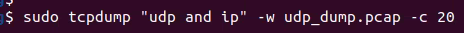

In [6]:
import socket 
from scapy.all import *

def process_packet(packet):
    print(packet.summary())
    #packet.show()
    print()

if __name__ == "__main__":
    packets = sniff(filter="tcp", prn=process_packet, store=15)
    wrpcap("sample_packets/captured_packets.pcap",packets)

Ether / IP / TCP 170.114.166.175:https > 192.168.62.121:64733 A



Ether / IP / TCP 170.114.166.175:https > 192.168.62.121:64733 PA / Raw

Ether / IP / TCP 192.168.62.121:64733 > 170.114.166.175:https A

Ether / IP / TCP 170.114.166.175:https > 192.168.62.121:64733 PA / Raw

Ether / IP / TCP 192.168.62.121:64733 > 170.114.166.175:https PA / Raw

Ether / IP / TCP 104.208.16.94:https > 192.168.62.121:52311 A

Ether / IP / TCP 104.208.16.94:https > 192.168.62.121:52311 PA / Raw

Ether / IP / TCP 192.168.62.121:52311 > 104.208.16.94:https FA

Ether / IP / TCP 170.114.166.175:https > 192.168.62.121:64733 PA / Raw

Ether / IP / TCP 192.168.62.121:64733 > 170.114.166.175:https PA / Raw

Ether / IP / TCP 192.168.62.121:52312 > 104.208.16.94:https S

Ether / IP / TCP 170.114.166.175:https > 192.168.62.121:64733 A

Ether / IP / TCP 104.208.16.94:https > 192.168.62.121:52311 FA

Ether / IP / TCP 192.168.62.121:52311 > 104.208.16.94:https A

Ether / IP / TCP 104.208.16.94:https > 192.168.62.121:52312 SA

Ether / IP / TCP 192.168.62.121:52312 > 104.208.16.94:https